In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load the dataset
data = pd.read_csv("../data/raw/data.csv")

# Display the first few rows
data.head()


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [10]:
# Dataset Structure
data.info()

# Check for the number of rows and columns
print(f"Rows: {data.shape[0]}, Columns: {data.shape[1]}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [5]:
# Summary Statistics for Numerical Features
data.describe()

# Check for unique values in categorical features
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"Unique values in {col}: {data[col].nunique()}")


Unique values in TransactionId: 95662
Unique values in BatchId: 94809
Unique values in AccountId: 3633
Unique values in SubscriptionId: 3627
Unique values in CustomerId: 3742
Unique values in CurrencyCode: 1
Unique values in ProviderId: 6
Unique values in ProductId: 23
Unique values in ProductCategory: 9
Unique values in ChannelId: 4
Unique values in TransactionStartTime: 94556


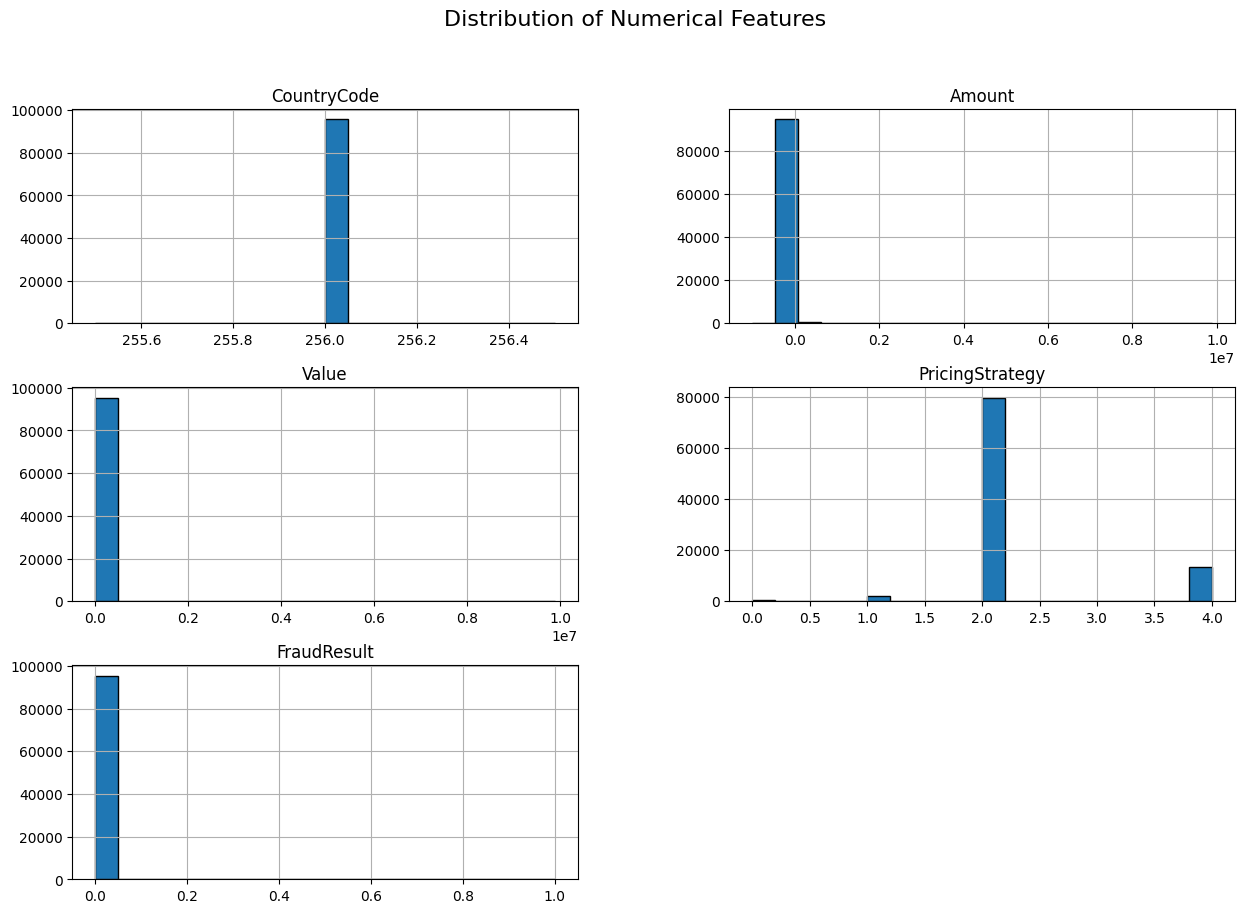

C:\Users\Hp\AppData\Local\Temp\ipykernel_3352\1453751791.py:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data[col], fill=True, label=col)


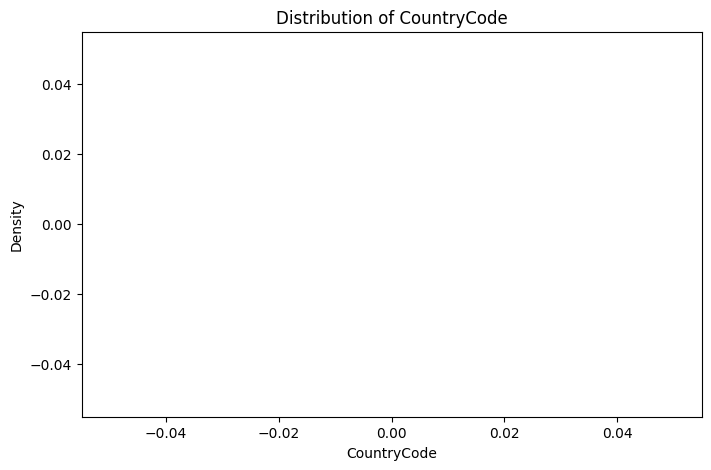

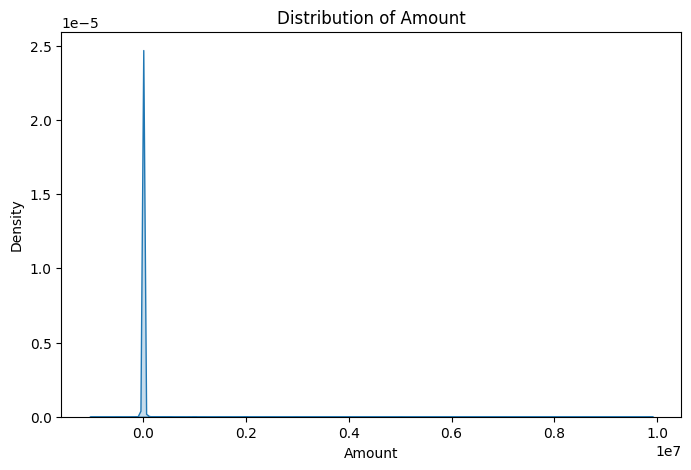

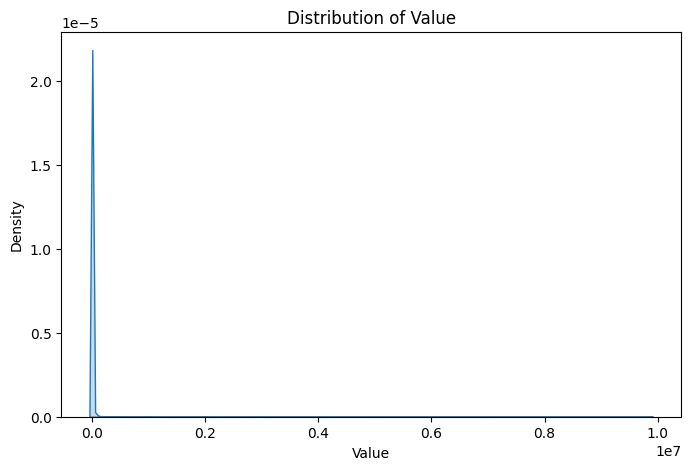

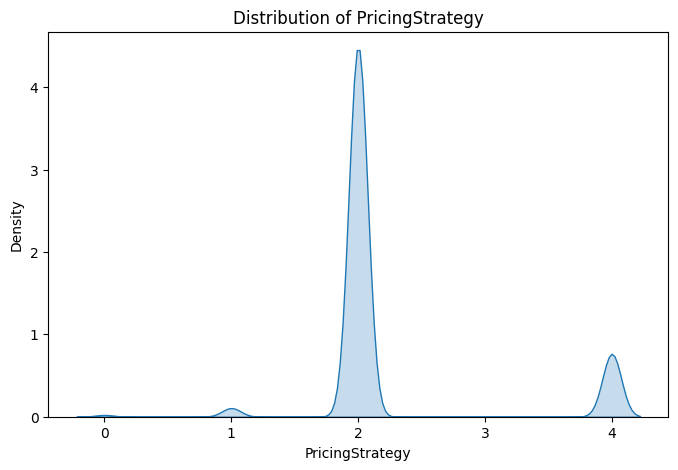

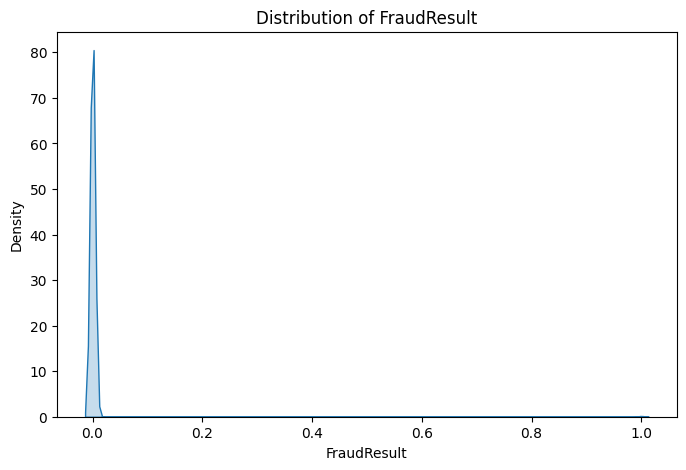

In [11]:
# Plot histograms for numerical features
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_columns].hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()

# Plot individual feature distributions
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.kdeplot(data[col], fill=True, label=col)
    plt.title(f"Distribution of {col}")
    plt.show()


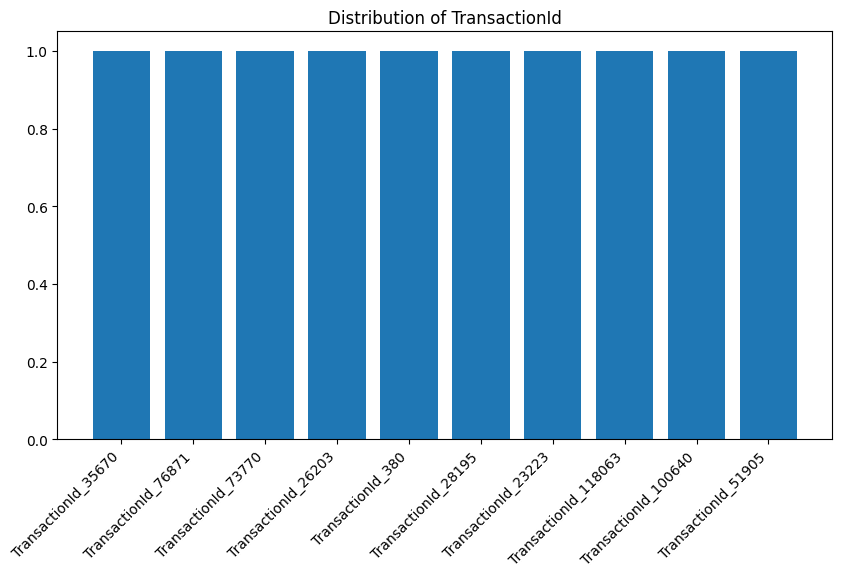

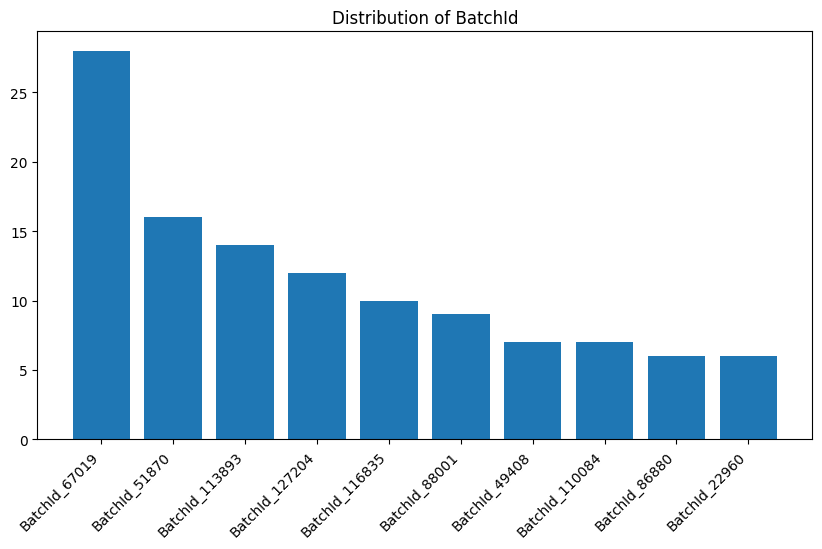

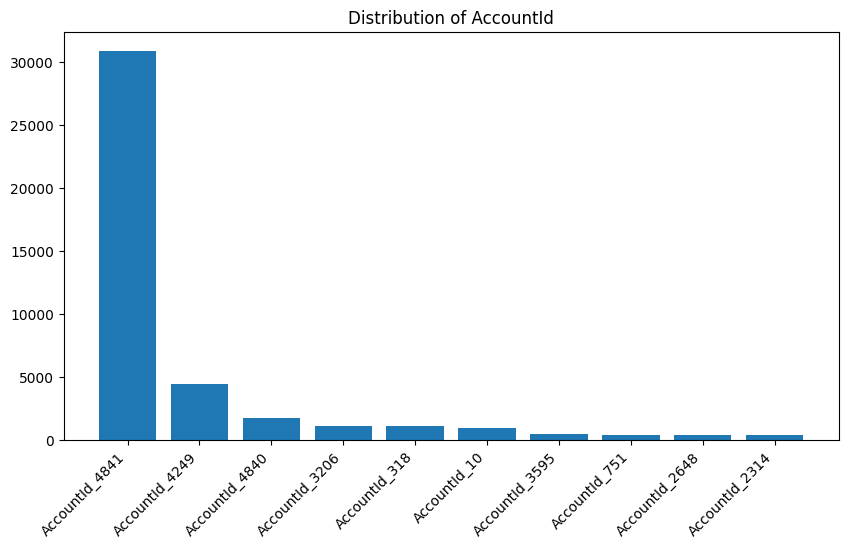

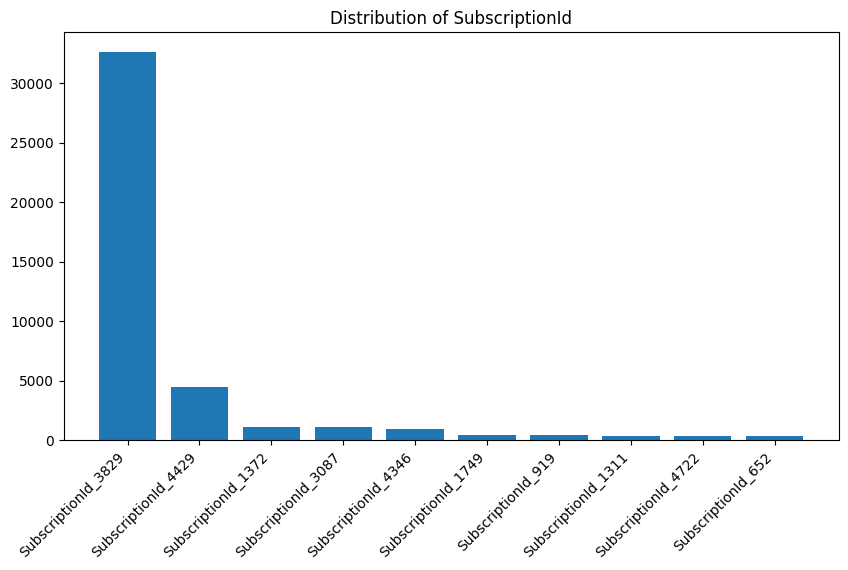

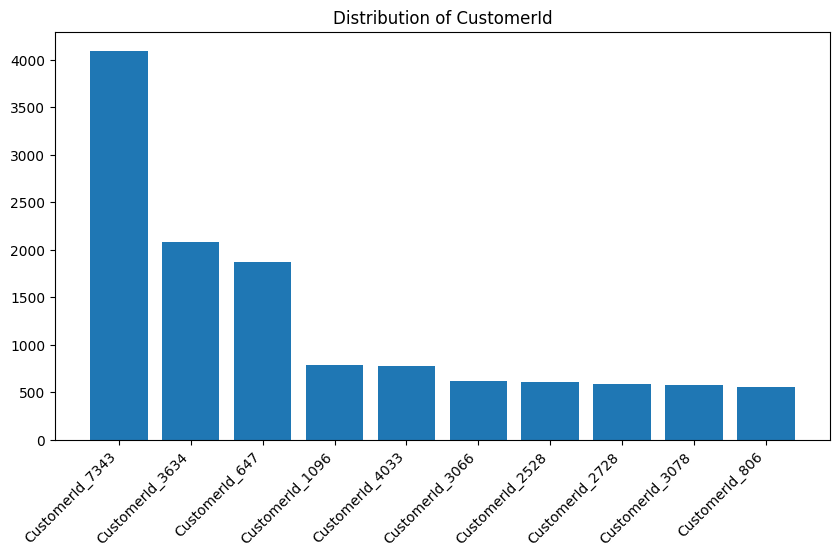

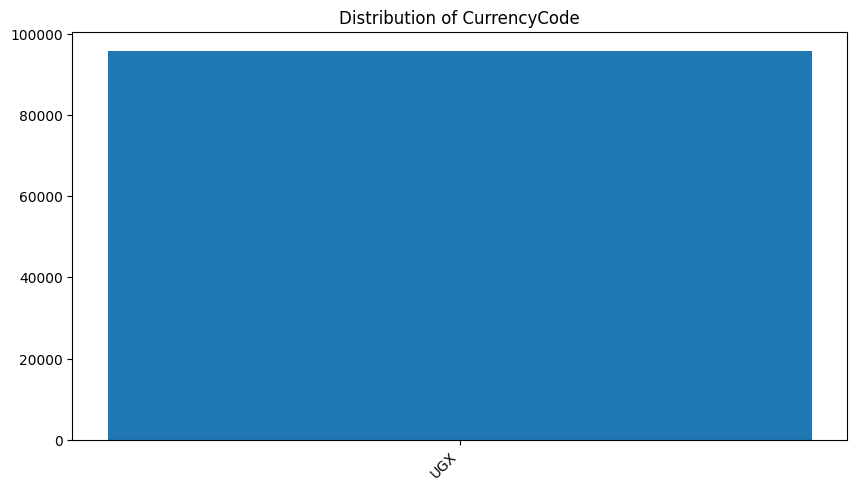

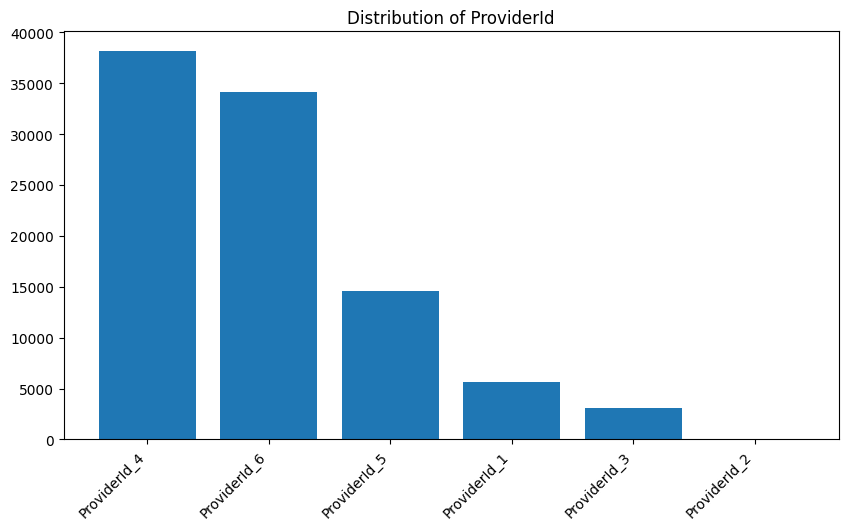

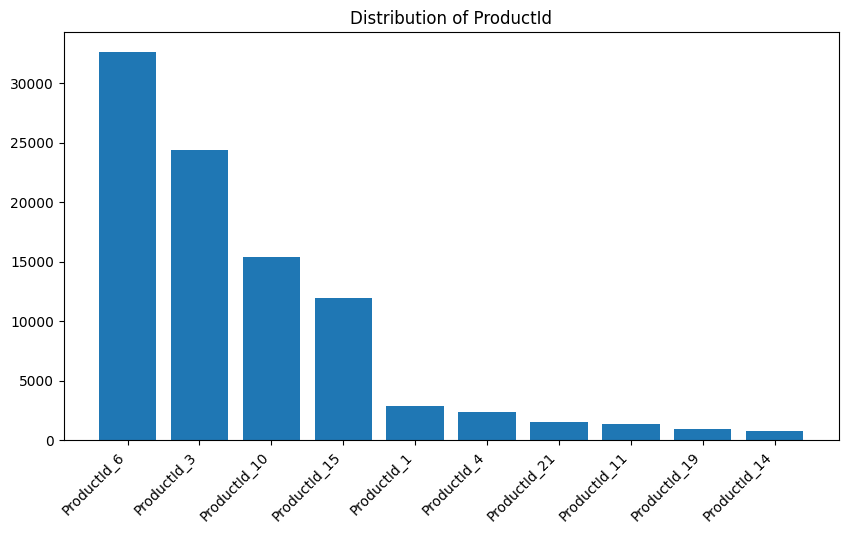

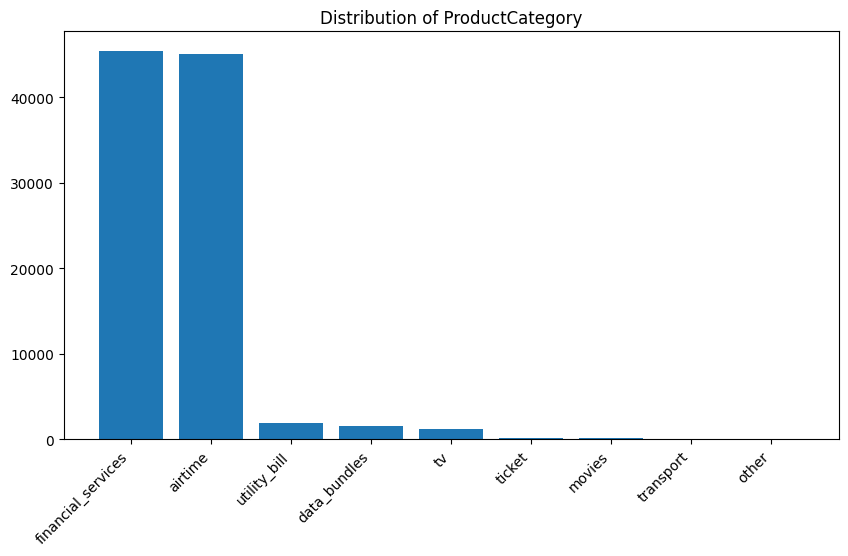

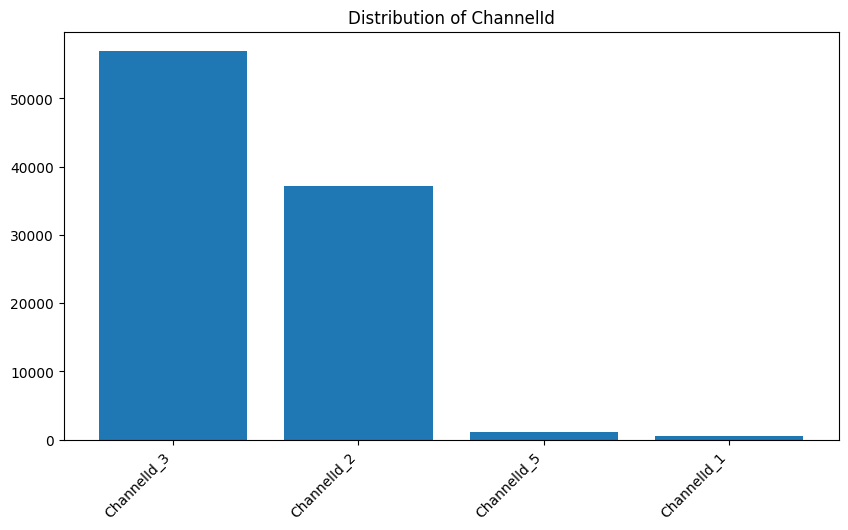

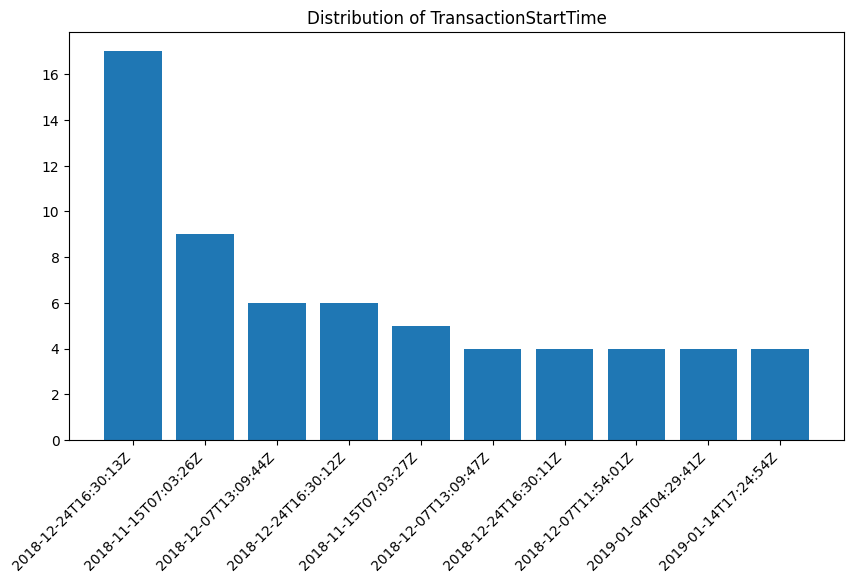

In [12]:
# Limit to top 10 most frequent categories
top_n = 10  # Adjust as needed
for col in categorical_columns:
    # Get value counts for categories
    value_counts = data[col].value_counts().head(top_n)
    
    # Create a bar plot using matplotlib
    plt.figure(figsize=(10, 6))  # Increase figure size for better spacing
    plt.bar(value_counts.index, value_counts.values)
    plt.title(f"Distribution of {col}")
    
    # Adjust x-axis ticks and spacing
    plt.xticks(rotation=45, ha='right')  # Rotate labels and adjust horizontal alignment
    plt.subplots_adjust(bottom=0.2)  # Increase bottom margin to avoid overlap
    
    # Show plot
    plt.show()


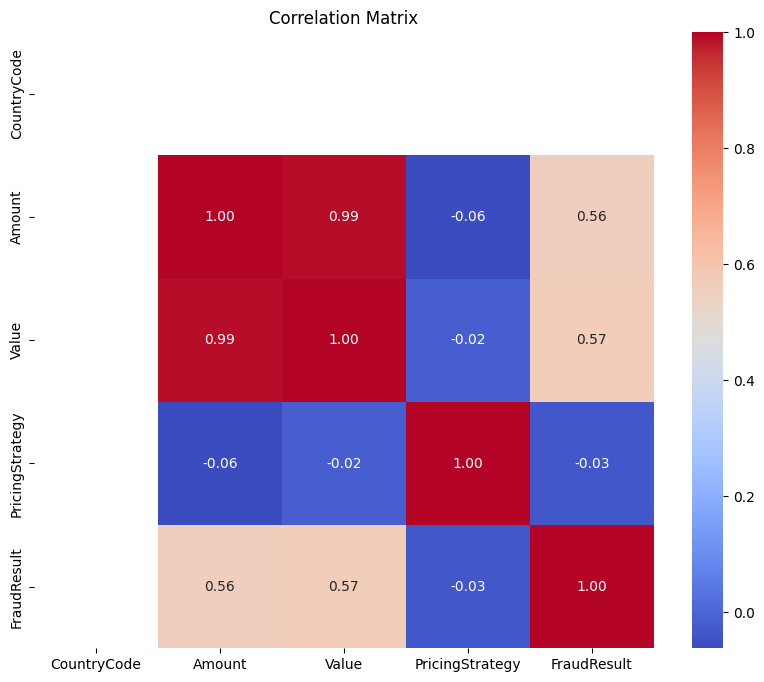

Highly Correlated Pairs (Threshold > 0.7):
Value   Amount    0.989692
Amount  Value     0.989692
dtype: float64


In [6]:
# Select only numerical columns for correlation calculation
numerical_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numerical_data.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Identify highly correlated pairs (threshold = 0.7)
high_corr_pairs = corr_matrix.unstack().sort_values(ascending=False)
high_corr_pairs = high_corr_pairs[high_corr_pairs != 1]  # Exclude self-correlation
print("Highly Correlated Pairs (Threshold > 0.7):")
print(high_corr_pairs[high_corr_pairs > 0.7])


In [7]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64


In [8]:
print(data.dtypes)

TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object


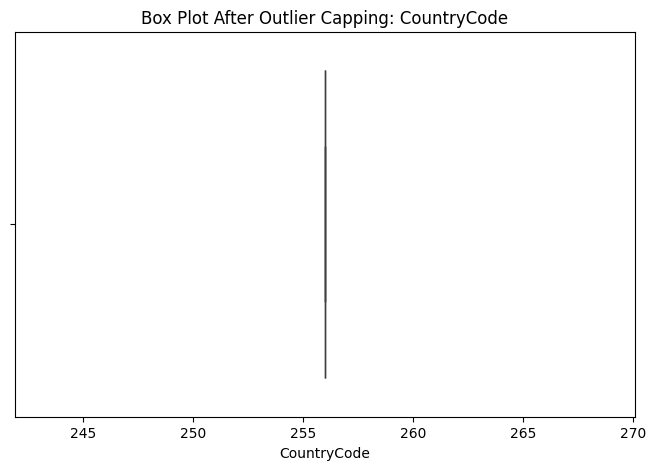

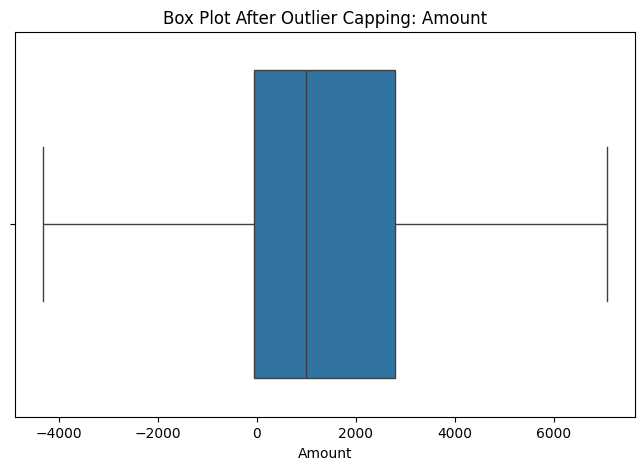

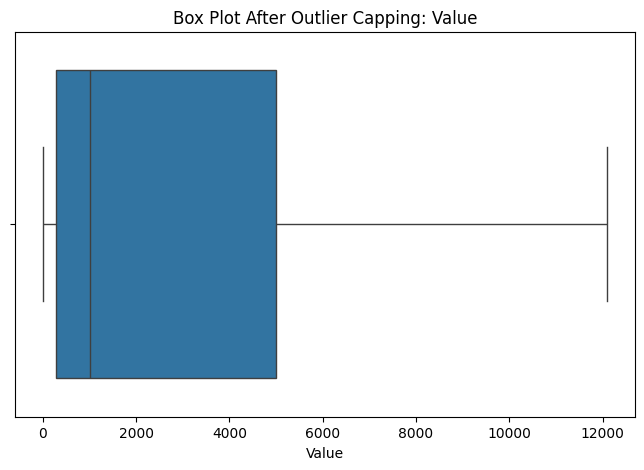

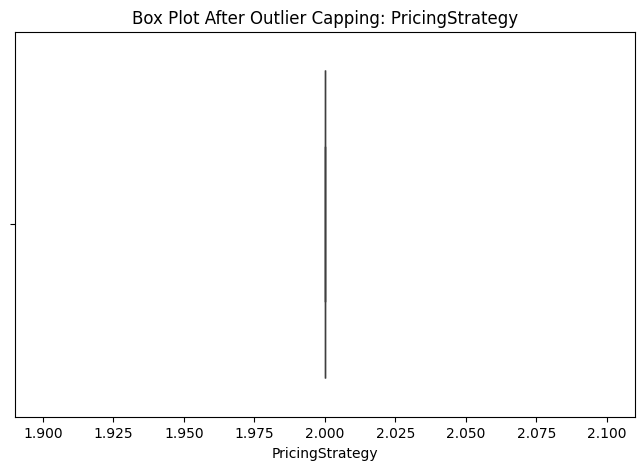

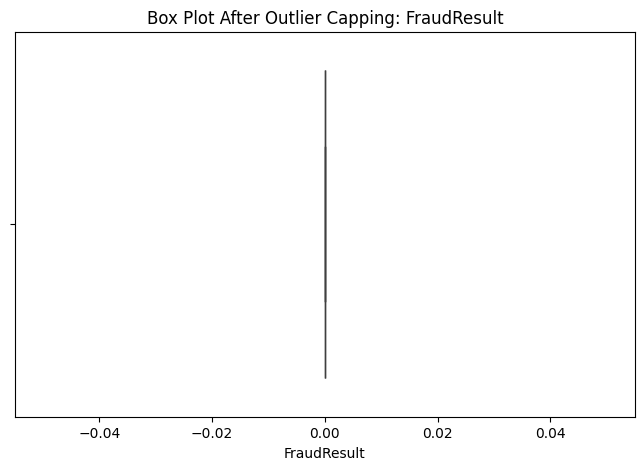

In [18]:
# Detect and cap outliers using IQR
for col in numerical_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap outliers
    data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)

# Check for remaining outliers
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=data[col], showfliers=True)
    plt.title(f"Box Plot After Outlier Capping: {col}")
    plt.xlabel(col)
    plt.show()


In [19]:
# Save the cleaned data for future use
data.to_csv("../data/processed/cleaned_data.csv", index=False)
